# Tasks

Machine Learning & Statistics

Winter 2023/24

Mohammed Mahdi

***

## Task 1

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number x without using the power operator or a package. 

> Rather, you should use Newton's Method. Start with an inital guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $zi$ and the next $z_{i+1}$ is less than some threshold, say 0.01. 

$$ z_{i+1} = z_i - \frac{z_i × z_i - x}{2z_i} $$

In [59]:
def sqrt(x):
    # Initial guess for the square root
    z = x / 4.0

    # Loop until we are accurate enough
    for i in range(100):
        # Newton's method for a better approximation:
        z = z - (((z*z)-x))/(2*z)

    # z should now be a good approximation for the square root
    return z

In [60]:
# Test the function on 3
sqrt(3)

1.7320508075688774

In [61]:
# Check Pythons value for square root of 3
3**0.5

1.7320508075688772

### Notes

1. The calculation $z^2 - x$ is exactly 0 when $z$ is the square root of $x$. It is greater than 0 when $z$ is too big. It is less than 0 when $z$ is too small. Thus $(z^2 - x)^2$ is a good candidate for a cost function. 

2. The derivative of $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question. 

***

End

***
## Task 2

> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use `scipy.stats` to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

|        | Chocolate Biscuit | Plain Biscuit|
|--------|-----------|-------|
| Coffee | 43        | 57    |
| Tea    | 56        | 45    |


In [62]:
# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

# Shuffles.
import random

In [63]:
# Setting up 4 lists for our dataset
coffee_chocolate_biscuit = [['Coffee', 'Chocolate']] * 43
coffee_plain_biscuit = [['Coffee', 'Plain']] * 57
tea_chocolate_biscuit = [['Tea', 'Chocolate']] * 56
tea_plain_biscuit = [['Tea', 'Plain']] * 45

In [64]:
# Raw data, merge the four lists.
raw_data = coffee_chocolate_biscuit + coffee_plain_biscuit + tea_chocolate_biscuit + tea_plain_biscuit

In [65]:
# Shuffle the data.
random.shuffle(raw_data)

In [66]:
# Zip the list - make the rows columns and the columns rows.
# Interchanges the outer and inner lists.
drink, biscuit = list(zip(*raw_data))

In [67]:
# Create a data frame.
df = pd.DataFrame({'Drink': drink, 'Biscuit': biscuit})

# Show.
df

,Drink,Biscuit
0,Coffee,Chocolate
1,Coffee,Chocolate
2,Coffee,Plain
3,Tea,Plain
4,Tea,Chocolate
...,...,...
196,Coffee,Plain
197,Tea,Plain
198,Tea,Plain
199,Coffee,Chocolate


### Contingency Table

In [68]:
# Perform Crosstabs Contingency.
cross = ss.contingency.crosstab(df['Drink'], df['Biscuit'])

# Show.
cross

CrosstabResult(elements=(array(['Coffee', 'Tea'], dtype=object), array(['Chocolate', 'Plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [69]:
# The first variable values, and the second.
first, second = cross.elements

# Show.
first, second

(array(['Coffee', 'Tea'], dtype=object),
 array(['Chocolate', 'Plain'], dtype=object))

### Statistical Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [70]:
# The counts.
cross.count

array([[43, 57],
       [56, 45]])

### Perform Chi-Square Test

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [71]:
# Statistics
result = ss.chi2_contingency(cross.count, correction=False)

# Show?
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [72]:
# The expected fequencies if independent.
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

### Verify no relationship based on the Chi-Square Test

In [73]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of coffee preference
# liking chocolate biscuits as we have overall.
100 * (99 / 201)

49.25373134328358

In [74]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of coffee preference
# liking plain biscuits as we have overall.
100 * (102 / 201)

50.74626865671642

In [75]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of tea preference
# liking chocolate biscuits as we have overall.
101 * (99 / 201)

49.74626865671642

In [76]:
# If no relationship between drink and biscuit preference,
# then we should have same proportion of tea preference
# liking plain biscuits as we have overall.
101 * (102 / 201)

51.25373134328358

***
### Notes

Performing a Chi-Square Test, the following results are observed: 

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866], [49.74626866, 51.25373134]]))

1. The p-value is small indicating that it is unlikely that there is a relationship between the variables, a p-value of 0.5 would mean a 50% relational probability. 

2. The expected_freq was verified based on the proportionality of preferences when computed with consideration to actual preferences. 

Ref: https://sites.radford.edu/~biol-web/stats/chi-sq_explanation.doc#:~:text=Interpretation,really%20is%20a%20significant%20difference.

3. The statistic of 3.11 is low indicating that the expected results are close to the actual data, meaning the 'goodness of fit' is accuarate

Ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp

4. New datasets created below to test the results when relationships are inferred

***

In [81]:
# Setting up 4 lists for our dataset
coffee_chocolate_biscuit2 = [['Coffee', 'Chocolate']] * 99
coffee_plain_biscuit2 = [['Coffee', 'Plain']] * 1
tea_chocolate_biscuit2 = [['Tea', 'Chocolate']] * 2
tea_plain_biscuit2 = [['Tea', 'Plain']] * 98
raw_data2 = coffee_chocolate_biscuit2 + coffee_plain_biscuit2 + tea_chocolate_biscuit2 + tea_plain_biscuit2

In [83]:
drink2, biscuit2 = list(zip(*raw_data2))
df2 = pd.DataFrame({'Drink2': drink2, 'Biscuit2': biscuit2})
cross2 = ss.contingency.crosstab(df2['Drink2'], df2['Biscuit2'])
first2, second2 = cross2.elements
cross2.count

array([[99,  1],
       [ 2, 98]])

In [87]:
result2 = ss.chi2_contingency(cross2.count, correction=False)
result2

Chi2ContingencyResult(statistic=188.1988198819882, pvalue=7.861390490984109e-43, dof=1, expected_freq=array([[50.5, 49.5],
       [50.5, 49.5]]))

P-Value is very close to 0 indicating that this observation is highly unlikely to be due to chance.

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=Values%20close%20to%200%20indicate,other%20than%20due%20to%20chance.

The statistic of 188 is very high indicating that the expected results are very far from the actual data, meaning the 'goodness of fit' is skewed

Ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp
***

In [94]:
# Setting up 4 lists for our dataset
coffee_chocolate_biscuit3 = [['Coffee', 'Chocolate']] * 49
coffee_plain_biscuit3 = [['Coffee', 'Plain']] * 51
tea_chocolate_biscuit3 = [['Tea', 'Chocolate']] * 52
tea_plain_biscuit3 = [['Tea', 'Plain']] * 48
raw_data3 = coffee_chocolate_biscuit3 + coffee_plain_biscuit3 + tea_chocolate_biscuit3 + tea_plain_biscuit3
drink3, biscuit3 = list(zip(*raw_data3))
df3 = pd.DataFrame({'Drink3': drink3, 'Biscuit3': biscuit3})
cross3 = ss.contingency.crosstab(df3['Drink3'], df3['Biscuit3'])
first3, second3 = cross3.elements
cross3.count

array([[49, 51],
       [52, 48]])

In [95]:
result3 = ss.chi2_contingency(cross3.count, correction=False)
result3

Chi2ContingencyResult(statistic=0.18001800180018002, pvalue=0.6713577705365845, dof=1, expected_freq=array([[50.5, 49.5],
       [50.5, 49.5]]))

P-Value is high indicating that this observation is highly likely to be due to chance

Ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=Values%20close%20to%200%20indicate,other%20than%20due%20to%20chance.

The statistic of 0.18 is very low indicating that the expected results are very close to the actual data, meaning the 'goodness of fit' is accuarate

Ref: https://www.investopedia.com/terms/c/chi-square-statistic.asp

***

End
***

***
## Task 3

> Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [62]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Statistics.
import scipy.stats as ss

In [63]:
# Load Penguins dataset.
df = pd.read_csv('penguins.csv')

# Show.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [64]:
# Gentoo Species Dataframe.
gentoo = df[df['species'] == 'Gentoo']

gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [65]:
# Males Gentoo Penguins Dataframe.
males = gentoo[gentoo['sex'] == 'MALE']['body_mass_g'].to_numpy()

males

array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
       5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
       5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
       5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
       5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
       5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
       5500., 5950., 5500., 5850., 6000., 5750., 5400.])

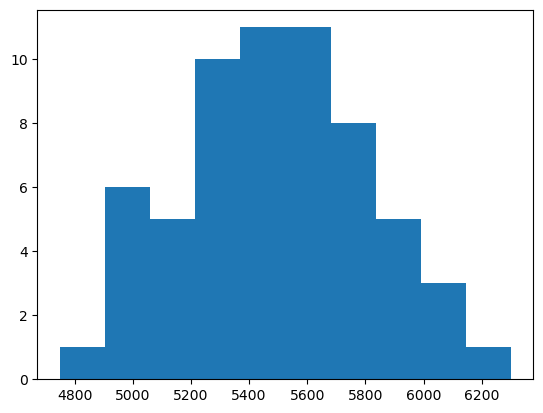

In [66]:
# Create an empty figure.
fig, ax = plt.subplots()

# Histogram of male body mass.
ax.hist(males);

In [67]:
# Females Gentoo Penguins Dataframe.
females = gentoo[gentoo['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

females

array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
       4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
       4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
       4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
       4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
       4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
       4375., 4925., 4850., 5200.])

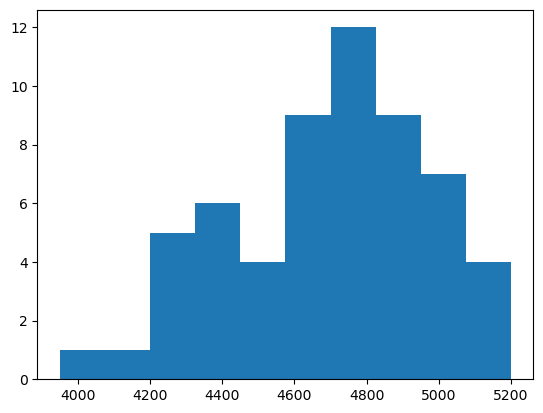

In [68]:
# Create an empty figure.
fig, ax = plt.subplots()

# Histogram of male body mass.
ax.hist(females);

In [69]:
# t-test.
ss.ttest_ind(males, females)

Ttest_indResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28)

pvalue=2.133687602018886e-28

Since the pvalue is so small, this would suggest statistical significance in the body mass difference between male and female gentoo penguins. This pvalue result being so small provides evidence that the mean of male body mass is different from the mean of the female body mass. This being said, the null hypothesis can be rejected as this would assume that there is no significant difference in the average body mass of male and female gentoo penguins. 

In [70]:
ss.describe(males)

DescribeResult(nobs=61, minmax=(4750.0, 6300.0), mean=5484.836065573771, variance=98068.30601092897, skewness=0.07737748628686811, kurtosis=-0.21409006763464378)

In [71]:
ss.describe(females)

DescribeResult(nobs=58, minmax=(3950.0, 5200.0), mean=4679.741379310345, variance=79286.33545069571, skewness=-0.3289116807241043, kurtosis=-0.3723947928940565)

***

End